In [41]:
from torchvision import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets

In [47]:
train_data = datasets.KMNIST(root='./', train=True, download=True)
test_data = datasets.KMNIST(root='./', train=False, download=True)

In [48]:
train_data.targets.shape, test_data.targets.shape

(torch.Size([60000]), torch.Size([10000]))

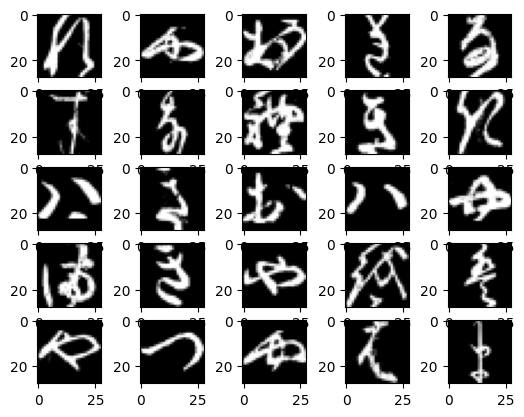

In [49]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_data.data[i], cmap='gray')

plt.show()

In [50]:
trainX = train_data.data.numpy()
testX = test_data.data.numpy()

trainX[0][10]

array([  0,   0,   0,   0,   0,   0,  48, 255, 192,   0,   0,  16, 207,
       252,  84,   0,   0,   0,   0,   0,  81, 255, 178,   0,   0,   0,
         0,   0], dtype=uint8)

In [51]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255
testX = testX / 255

trainX[0][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1882353 , 1.        , 0.7529412 , 0.        ,
       0.        , 0.0627451 , 0.8117647 , 0.9882353 , 0.32941177,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31764707, 1.        , 0.69803923, 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [52]:
class FC_NN(nn.Module):
    def __init__(self):
        super(FC_NN, self).__init__()
        self.input_layer = nn.Linear(28*28, 128)
        self.hidden_layer = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.input_layer(x)
        x = F.relu(x)
        output = self.hidden_layer(x)
        
        return output

In [53]:
mnist_model = FC_NN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_model.parameters(), lr=0.01)

In [54]:
from torch.utils.data import TensorDataset, DataLoader

ds_train = TensorDataset(torch.from_numpy(trainX), train_data.targets)
ds_test = TensorDataset(torch.from_numpy(testX), test_data.targets)

train_loader = DataLoader(dataset=ds_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=ds_test, batch_size=64, shuffle=False)

mnist_model.train()

n_epochs = 20
i = 1

for epoch in range(n_epochs):
    avg_loss = 0
    total_batch = len(train_loader)

    for data, targets in train_loader:
        optimizer.zero_grad()
        x = data.view(-1, 784)
        prediction = mnist_model(x)
        loss = loss_fn(prediction, targets)
        loss.backward()
        optimizer.step()
        avg_loss += loss / total_batch
    
    print("Epoch:", "%04d"% (epoch+1), "loss=", "{:.9f}".format(avg_loss))

print("학습 종료")

Epoch: 0001 loss= 0.373264164
Epoch: 0002 loss= 0.228888810
Epoch: 0003 loss= 0.198643401
Epoch: 0004 loss= 0.177555919
Epoch: 0005 loss= 0.162411138
Epoch: 0006 loss= 0.152075678
Epoch: 0007 loss= 0.141882360
Epoch: 0008 loss= 0.135310620
Epoch: 0009 loss= 0.124780290
Epoch: 0010 loss= 0.121697083
Epoch: 0011 loss= 0.114559278
Epoch: 0012 loss= 0.111997589
Epoch: 0013 loss= 0.105327047
Epoch: 0014 loss= 0.104234532
Epoch: 0015 loss= 0.104935989
Epoch: 0016 loss= 0.096125208
Epoch: 0017 loss= 0.099254966
Epoch: 0018 loss= 0.091936506
Epoch: 0019 loss= 0.093826890
Epoch: 0020 loss= 0.085208371
학습 종료


In [57]:
from torch.utils.data import TensorDataset, DataLoader

def models(lr, batch_size, epochs):
    mnist_model = FC_NN()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(mnist_model.parameters(), lr=lr)

    ds_train = TensorDataset(torch.from_numpy(trainX), train_data.targets)
    ds_test = TensorDataset(torch.from_numpy(testX), test_data.targets)

    train_loader = DataLoader(dataset=ds_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=ds_test, batch_size=batch_size, shuffle=False)

    mnist_model.train()

    n_epochs = epochs
    i = 1

    for epoch in range(n_epochs):
        avg_loss = 0
        total_batch = len(train_loader)

        for data, targets in train_loader:
            optimizer.zero_grad()
            x = data.view(-1, 784)
            prediction = mnist_model(x)
            loss = loss_fn(prediction, targets)
            loss.backward()
            optimizer.step()
            avg_loss += loss / total_batch
        
        # print("Epoch:", "%04d"% (epoch+1), "loss=", "{:.9f}".format(avg_loss))

    # print("학습 종료")

    mnist_model.eval()
    correct = 0

    with torch.no_grad():
        for data, targets in test_loader:
            x = data.view(-1, 784)
            prediction = mnist_model(x)
            output, predicted = torch.max(prediction, 1)
            correct += predicted.eq(targets).sum()
        
        data_num = len(test_loader.dataset)
        print(f"lr({lr}), batch_size({batch_size}), epochs({epochs})")
        print(f"테스트 데이터에서 예측 정확도: {correct}/{data_num} ({(100. * correct / data_num):.0f}%)\n")

params = {
    "lr" : [0.005, 0.01, 0.05],
    "batch_size" : [32, 64, 128],
    "epoch" : [10, 20, 30]
}

for i in params["lr"]:
    for j in params["batch_size"]:
        for k in params["epoch"]:
            models(i, j, k)

lr(0.005), batch_size(32), epochs(10)
테스트 데이터에서 예측 정확도: 8767/10000 (88%)

lr(0.005), batch_size(32), epochs(20)
테스트 데이터에서 예측 정확도: 8860/10000 (89%)

lr(0.005), batch_size(32), epochs(30)
테스트 데이터에서 예측 정확도: 8781/10000 (88%)

lr(0.005), batch_size(64), epochs(10)
테스트 데이터에서 예측 정확도: 8846/10000 (88%)

lr(0.005), batch_size(64), epochs(20)
테스트 데이터에서 예측 정확도: 8899/10000 (89%)

lr(0.005), batch_size(64), epochs(30)
테스트 데이터에서 예측 정확도: 8908/10000 (89%)

lr(0.005), batch_size(128), epochs(10)
테스트 데이터에서 예측 정확도: 8840/10000 (88%)

lr(0.005), batch_size(128), epochs(20)
테스트 데이터에서 예측 정확도: 8806/10000 (88%)

lr(0.005), batch_size(128), epochs(30)
테스트 데이터에서 예측 정확도: 8842/10000 (88%)

lr(0.01), batch_size(32), epochs(10)
테스트 데이터에서 예측 정확도: 8440/10000 (84%)

lr(0.01), batch_size(32), epochs(20)
테스트 데이터에서 예측 정확도: 8512/10000 (85%)

lr(0.01), batch_size(32), epochs(30)
테스트 데이터에서 예측 정확도: 8344/10000 (83%)

lr(0.01), batch_size(64), epochs(10)
테스트 데이터에서 예측 정확도: 8669/10000 (87%)

lr(0.01), batch_size(64), epochs(20)
테스

예측 결과: tensor([6])
이 이미지 데이터의 정답 레이블은 6입니다.


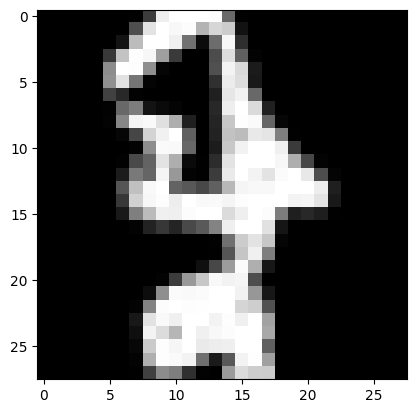

In [56]:
# https://github.com/rois-codh/kmnist
mnist_model = FC_NN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_model.parameters(), lr=lr)

ds_train = TensorDataset(torch.from_numpy(trainX), train_data.targets)
ds_test = TensorDataset(torch.from_numpy(testX), test_data.targets)

train_loader = DataLoader(dataset=ds_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=ds_test, batch_size=batch_size, shuffle=False)

mnist_model.train()

n_epochs = epochs
i = 1

for epoch in range(n_epochs):
    avg_loss = 0
    total_batch = len(train_loader)

    for data, targets in train_loader:
        optimizer.zero_grad()
        x = data.view(-1, 784)
        prediction = mnist_model(x)
        loss = loss_fn(prediction, targets)
        loss.backward()
        optimizer.step()
        avg_loss += loss / total_batch
    
    print("Epoch:", "%04d"% (epoch+1), "loss=", "{:.9f}".format(avg_loss))

print("학습 종료")

mnist_model.eval()
correct = 0

with torch.no_grad():
    for data, targets in test_loader:
        x = data.view(-1, 784)
        prediction = mnist_model(x)
        output, predicted = torch.max(prediction, 1)
        correct += predicted.eq(targets).sum()
    
    data_num = len(test_loader.dataset)
    print(f"lr({lr}), batch_size({batch_size}), epochs({epochs})")
    print(f"테스트 데이터에서 예측 정확도: {correct}/{data_num} ({(100. * correct / data_num):.0f}%)\n")